# A simple Goddard problem

<img src="goddard.jpg" width=417 height=512>

This well-known problem (see for instance [1],[2]) models the ascent of a rocket through the atmosphere, and we restrict here ourselves to  vertical (monodimensional) trajectories.
The state variables are the altitude, speed and mass of the rocket during the flight, for a total dimension of 3. The rocket is subject to gravity, thrust and drag forces. The final time is free, and the objective is to reach a certain altitude with a minimal fuel consumption, ie a maximal final mass. All units are renormalized.

$$
\left \lbrace
\begin{array}{l}
Max\ m(T)\\
\dot r = v\\
\dot v = -\frac{1}{r^2} + \frac{1}{m} (T_{max} u - D(r,v))\\
\dot m = - b u\\
u(\cdot) \in [0,1]\\
r(0)=1,\ v(0)=0,\ m(0)=1\\
r(1) = 1.01\\
D(r(\cdot),v(\cdot)) \le C\\
T\ is\ free
\end{array}
\right .
$$

The drag term is a function of speed and altitude defined as 
$D(r,v)=Av^2\rho(r)$,
with the volumic mass given by the approximate model 
$\rho(r)=e^{-k(r-r_0)}$.

In the following we use the parameters 
$b=7,\ T_{max}=3.5,\ A=310,\ k=500,\ r_0=1$.

The Hamiltonian is an affine function of the control, so singular arcs may occur. We consider here a path constraint limiting the value of the drag effect: $D(r,v)\le C$. We can observe that depending on the value of C, the control structure changes. In the unconstrained case, the optimal trajectory presents a singular arc with a non-maximal thrust. When C is set under the maximal value attained by the drag in the unconstrained case, a constrained arc appears. If C is small enough, the singular arc is completely replaced by the constrained arc.

### Import Bocop module

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
import os
import bocop
bocop_root_path = os.path.dirname(bocop.__file__)
print("List of Bocop examples",os.listdir(os.path.join(bocop_root_path,"examples")))

List of Bocop examples ['smooth_case', 'goddard', 'fuller', 'beam', 'default', 'vanderpol']


### Select and build problem

- problem_path: location of the problem definition (files problem.cpp and problem.def). Bocop comes with several predefined problems in the examples/ subfolder
- clean (0|1): set to 1 to delete previous build files (rebuild from scratch)
- debug (0|1): set to 1 to build in debug mode (slower)
- verbose (0 to 2): verbose level

In [2]:
problem_path = os.path.join(bocop_root_path,"examples/goddard") # using files from examples packages with bocop
bocop.build(problem_path, clean=1, debug=0, verbose=1, cmake_options = '-DCMAKE_CXX_COMPILER=g++')

[EXEC] > ['cmake -DCMAKE_BUILD_TYPE=Release -DPROBLEM_DIR=/home/martinon/bocop/bocop3/bocop/examples/goddard -DCPP_FILE=problem.cpp  -DCMAKE_CXX_COMPILER=g++  /home/martinon/bocop/bocop3/bocop']
>	-- The C compiler identification is GNU 9.3.0
>	-- The CXX compiler identification is GNU 9.3.0
>	-- Detecting C compiler ABI info
>	-- Detecting C compiler ABI info - done
>	-- Check for working C compiler: /home/martinon/miniconda3/envs/bocop-dev/bin/x86_64-conda-linux-gnu-cc - skipped
>	-- Detecting C compile features
>	-- Detecting C compile features - done
>	-- Detecting CXX compiler ABI info
>	-- Detecting CXX compiler ABI info - done
>	-- Check for working CXX compiler: /usr/bin/g++ - skipped
>	-- Detecting CXX compile features
>	-- Detecting CXX compile features - done
>	-- Problem path: /home/martinon/bocop/bocop3/bocop/examples/goddard
>	-- Using CPPAD found at /home/martinon/miniconda3/envs/bocop-dev/include/cppad/..
>	-- Using IPOPT found at /home/martinon/miniconda3/envs/bocop-de

0

### Optional: set the value for the drag constraint (see problem description)
The value of the constant C will change the structure of the optimal control, for instance
- C = 0.4: Bang - Constrained - Bang
- C = 0.6: Bang - Constrained - Singular - Bang
- C = 0.8: Bang - Singular - Bang

Note: there is no need to rebuild the problem when changing constant values.

In [3]:
bocop.setInDef("constant.5",0.8,os.path.join(problem_path,"problem.def"))

### Run the optimization
- problem_path: location of the problem definition
- clean (0|1): set to 1 to delete previous solution files
- verbose (0 to 2): verbose level

(note: the ouptut from the optimization currently does not show in the notebook)

In [5]:
bocop.run(problem_path, clean=1, verbose=1)

interactive(children=(IntSlider(value=22, continuous_update=False, description='iteration', max=22), Output())…

Done


### Read solution

todo: link here to doc of class NLPsolution

In [6]:
solution = bocop.readSolution(os.path.join(problem_path,"problem.sol"))
print("Bocop returns status {} with objective {:2.4g} and constraint violation {:2.4g}".format(solution.status,solution.objective,solution.constraints))
p0 = []
for i in range(solution.dim_state):
    p0.append(solution.costate[i][0])
print("Costate at first time stage (t0+h/2): ",p0)
print("Multipliers for initial conditions: ",solution.boundarycond_multipliers[0:solution.dim_state])

Loading solution:  /home/martinon/bocop/bocop3/bocop/examples/goddard/problem.sol
Bocop returns status 0 with objective -0.6342 and constraint violation 1.642e-13
Costate at first time stage (t0+h/2):  [50.9201052042912, 1.8565062167744, 0.7049999746689]
Multipliers for initial conditions:  [50.92924454  1.94069916  0.69329341]


### Plot solution
- graph (1|2): 
    - 1: plot state and control variables
    - 2: plot state, control and dual variables (costates)

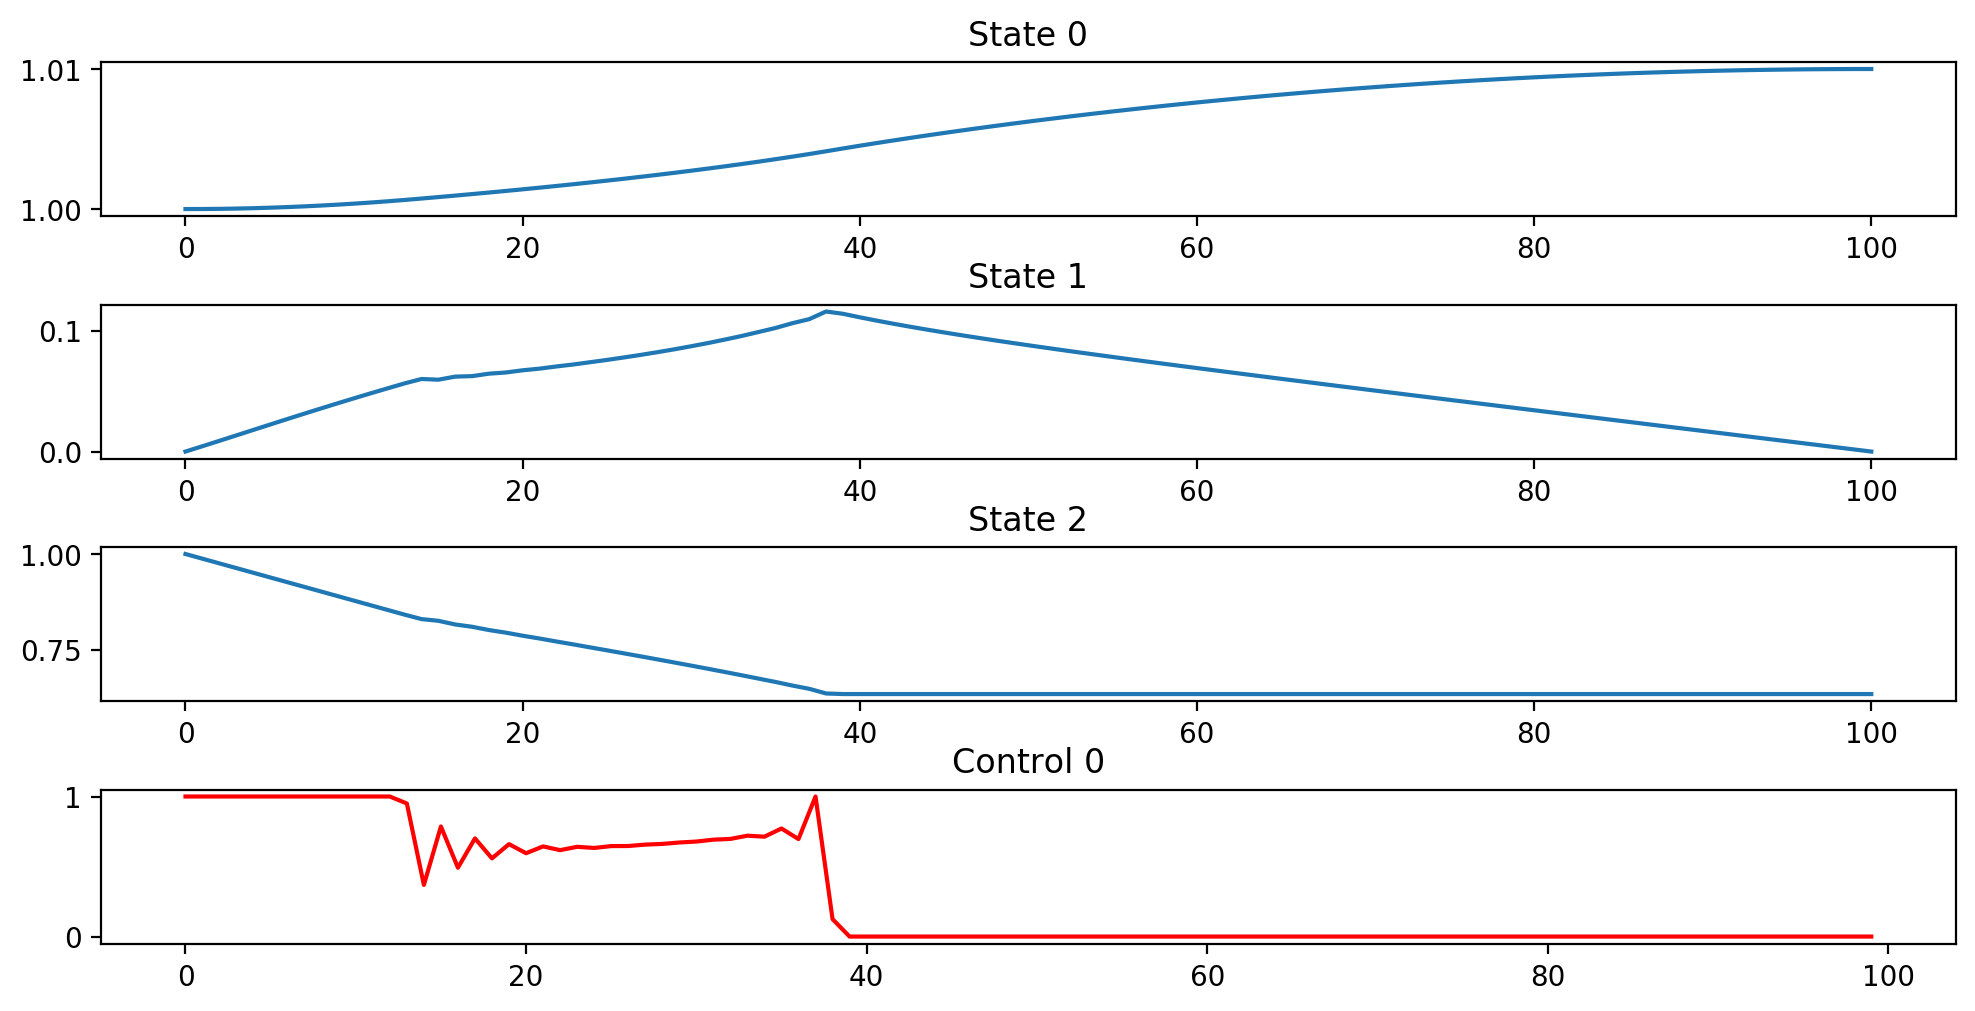

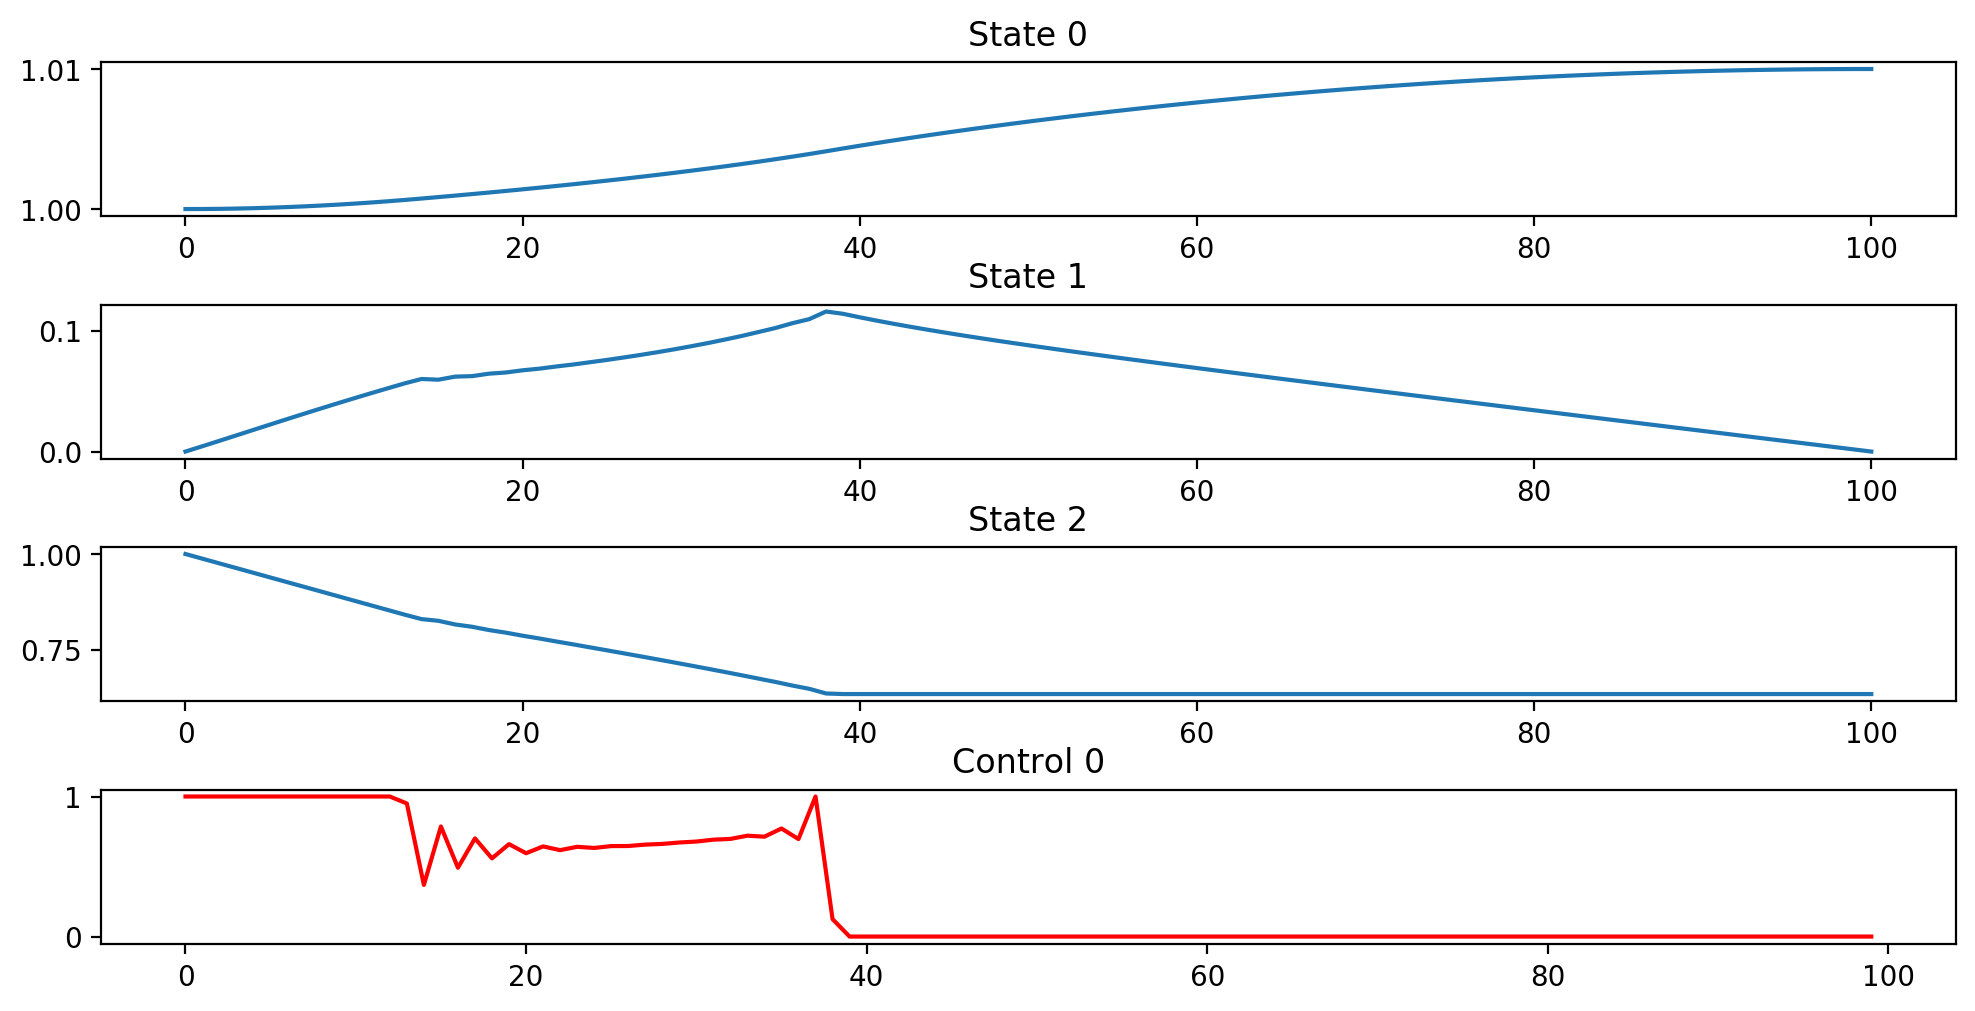

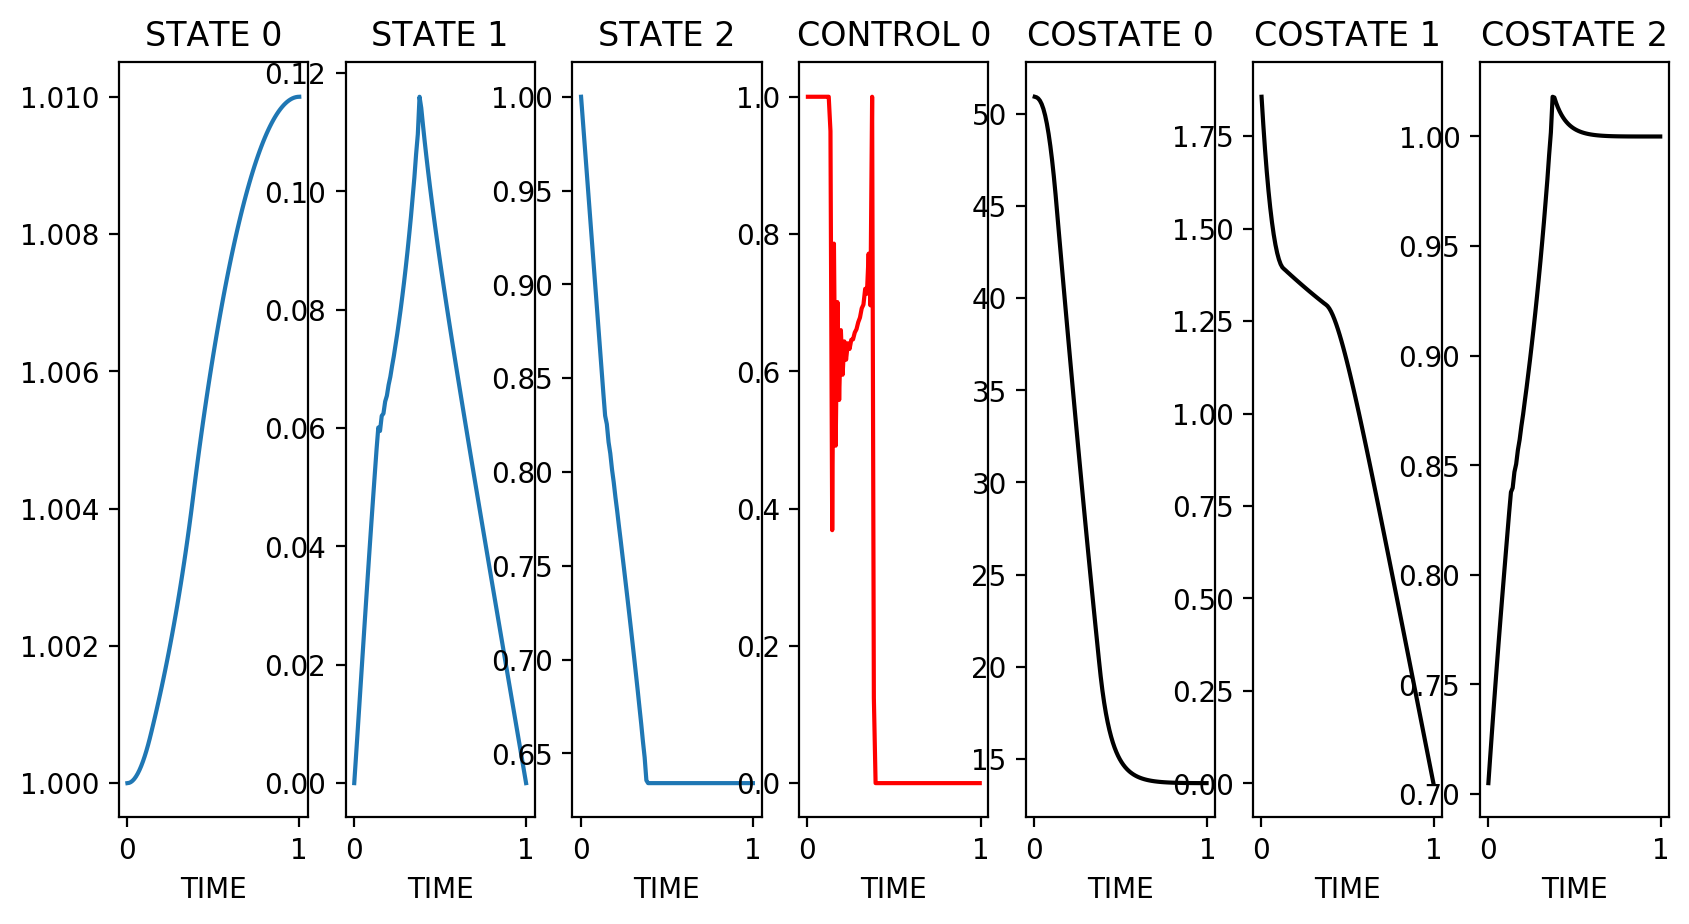

In [7]:
graph = 2
solution.plot(graph)

### All in one call
Call to solve() will build and run the problem then return the solution.
Plot can be disabled by setting argument 'graph' to 0

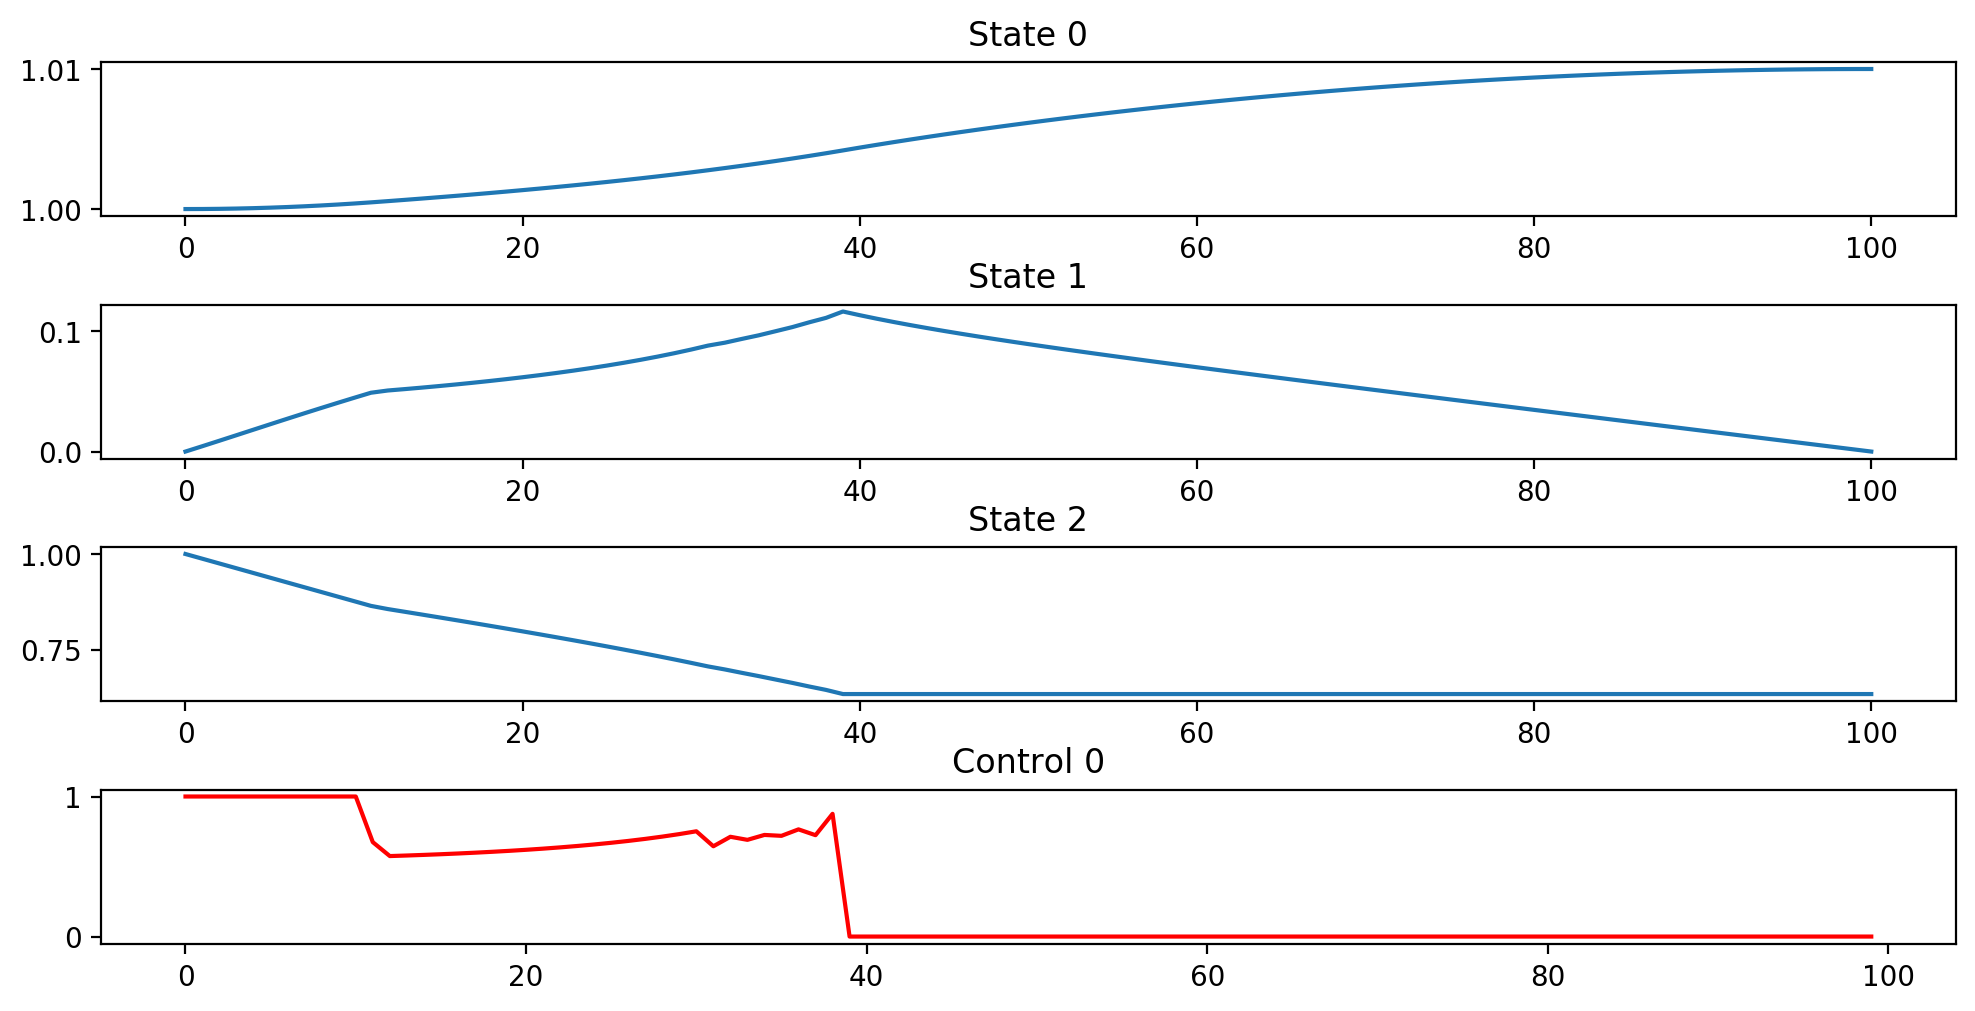

interactive(children=(IntSlider(value=24, continuous_update=False, description='iteration', max=24), Output())…

Done
Loading solution:  /home/martinon/bocop/bocop3/bocop/examples/goddard/problem.sol


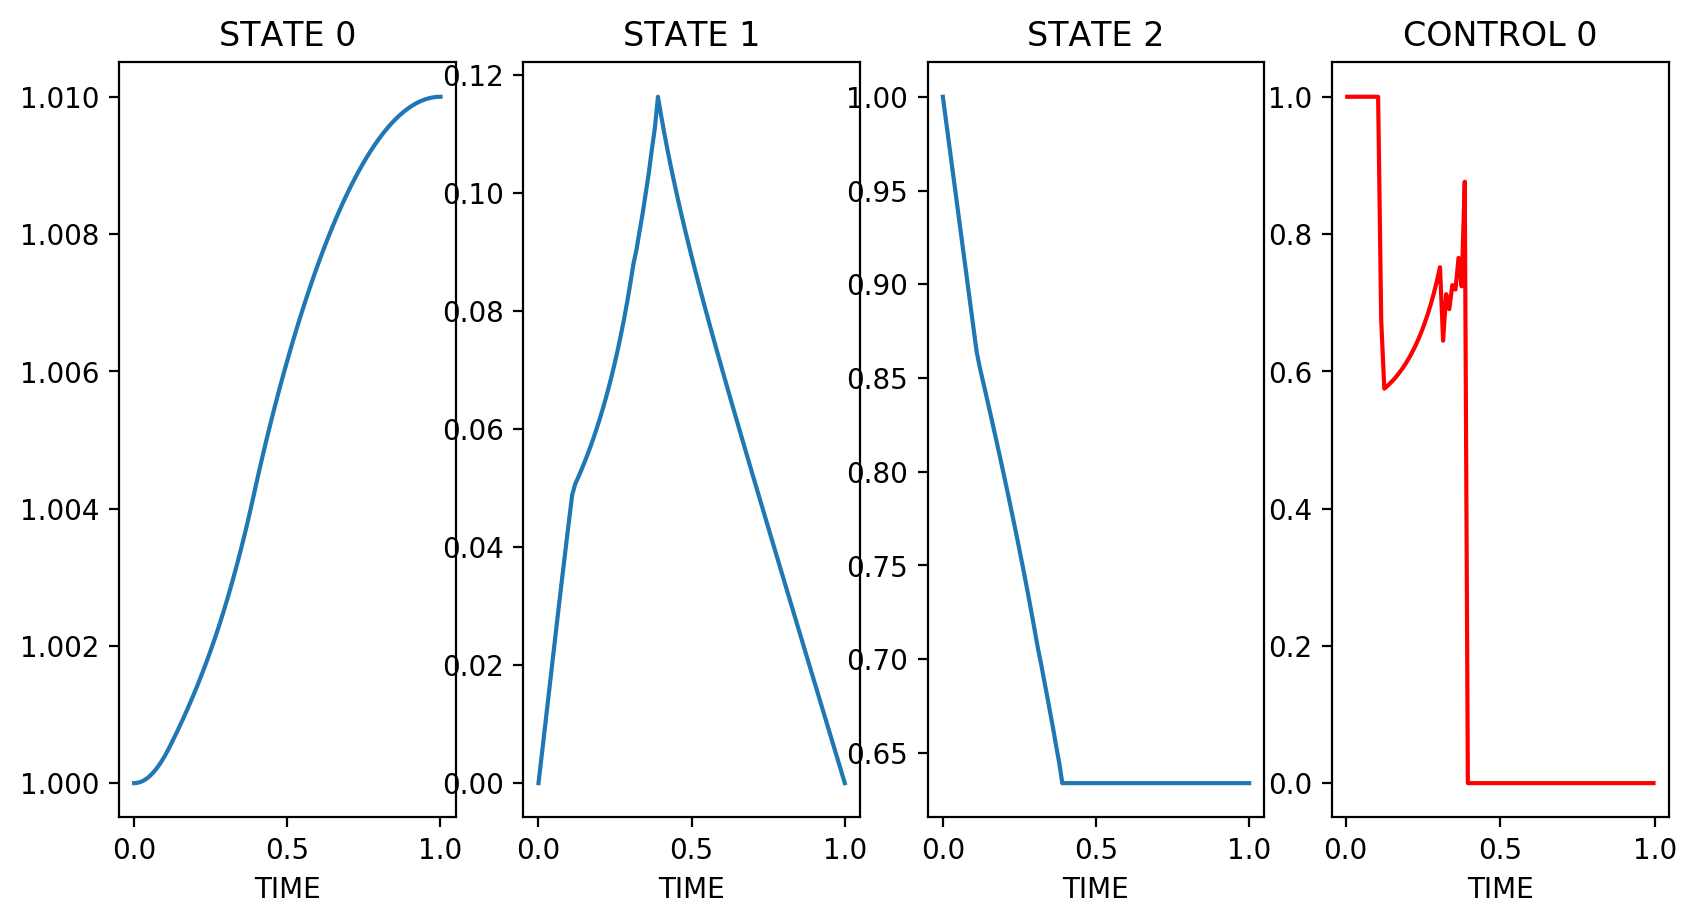

Bocop returns status 0 with objective -0.6339 and constraint violation 3.577e-13


In [9]:
bocop.setInDef("constant.5",0.6,os.path.join(problem_path,"problem.def"))
solution = bocop.solve(problem_path, clean=0, graph=1, verbose=1, cmake_options = '-DCMAKE_CXX_COMPILER=g++')
print("Bocop returns status {} with objective {:2.4g} and constraint violation {:2.4g}".format(solution.status,solution.objective,solution.constraints))

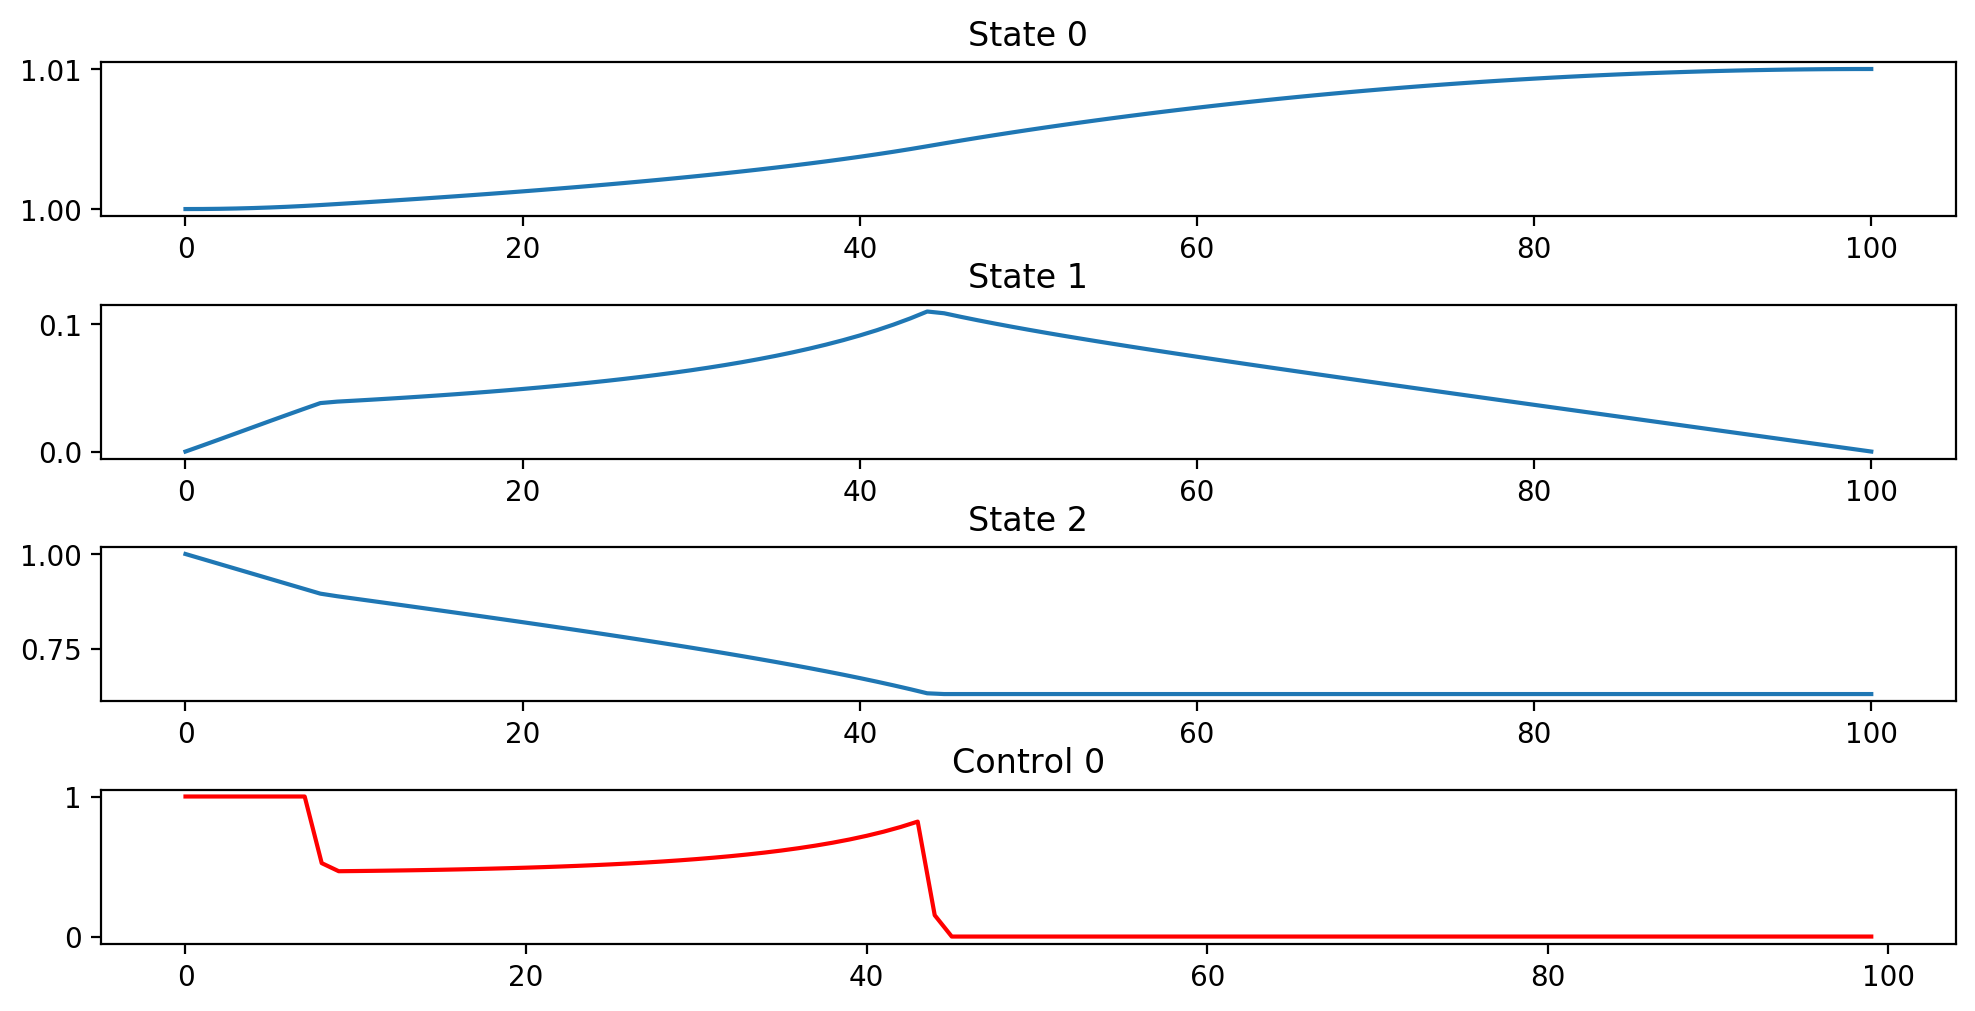

interactive(children=(IntSlider(value=20, continuous_update=False, description='iteration', max=20), Output())…

Done
Loading solution:  /home/martinon/bocop/bocop3/bocop/examples/goddard/problem.sol


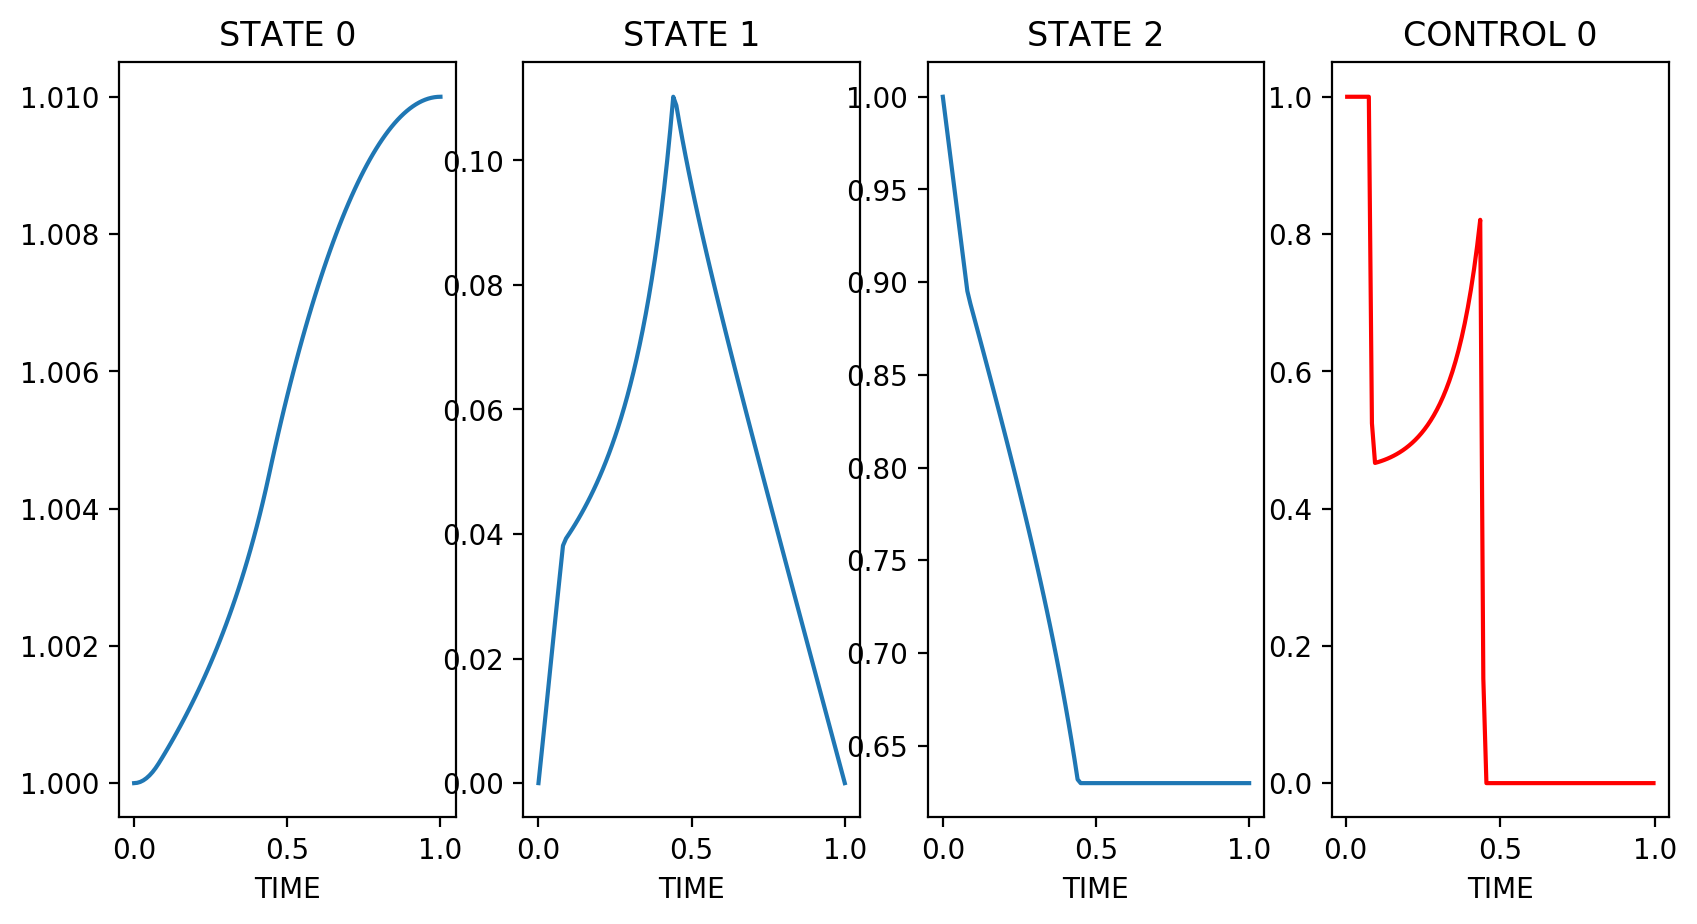

Bocop returns status 0 with objective -0.6298 and constraint violation 2.185e-13


In [10]:
bocop.setInDef("constant.5",0.4,os.path.join(problem_path,"problem.def"))
solution = bocop.solve(problem_path, clean=0, debug=0, graph=1, verbose=1, cmake_options = '-DCMAKE_CXX_COMPILER=g++')
print("Bocop returns status {} with objective {:2.4g} and constraint violation {:2.4g}".format(solution.status,solution.objective,solution.constraints))